<a href="https://colab.research.google.com/github/tomersk/learn-python/blob/main/10_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 10.5 PCA
Principal component analysis (PCA) is a tool to reduce the dimensionality of the data. Sometimes few dimension have significant correlation among each other, which is to say that they share almost the same information, in such case even if we reduce such dimension, almost the same information will be preserved. We will use the *sklearn.decomposition.PCA* to perform the PCA. First we generate the data and looks at its correlation.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: covariance is not positive-semidefinite.
  if sys.path[0] == '':


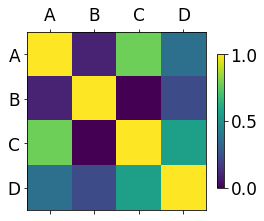

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# change the default parameters of the plot
params = {'font.size': 17}
plt.rcParams.update(params)

# let us generate 4 dimensional data set
mean = 10*np.random.rand(4)
cov = np.random.rand(4,4)
data = np.random.multivariate_normal(mean,cov,100) 
names = ['A', 'B', 'C', 'D']

plt.matshow(np.corrcoef(data.T), vmax=1, vmin=0)
plt.colorbar(shrink=0.6)
plt.xticks(range(4), names)
plt.yticks(range(4), names)
plt.show()

Above figure shows the correlation among the dimension of the data. The off diagonal correlation is non-zero, it means the PCA can reduce the dimensionality, higher the off-diagonal entries, more PCA will be able to reduce the dimensionality of the data.


In [21]:
# we perform PCA with all (4) components
# in general we can pick up only few components depending upon the explained variance
pca = PCA(n_components=4)
data1 = pca.fit_transform(data)

We can check its correlation. Below figure shows the correlation of the scaled/new data. Off-diagonal element of the correlation matrix are zero, which means the data is orthogonal now. That is why this is also called Empirical Orthogonal Function in hydrology.

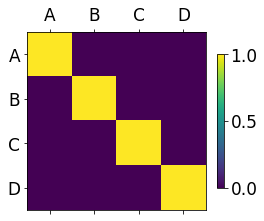

In [22]:
plt.matshow(np.corrcoef(data1.T), vmax=1, vmin=0)
plt.colorbar(shrink=0.6)
plt.xticks(range(4), names)
plt.yticks(range(4), names)
plt.show()

We can look at the explained variance. Last component is explaining very small mount of variance and can be dropped without loosing much of the data.

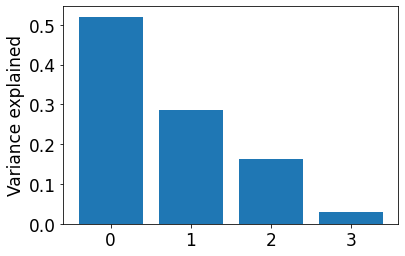

In [26]:
data_var = pca.explained_variance_ratio_

plt.bar(range(4), data_var)
plt.ylabel("Variance explained")
plt.show()